# Visualization Example

In [19]:
from IPython.display import display, HTML
display(HTML('<a target=\"_blank\" href=\"https://colab.research.google.com/github/WaterFutures/EPyT-Flow/blob/main/docs/examples/visualization.ipynb\"><img src=\"https://colab.research.google.com/assets/colab-badge.svg\" alt=\"Open In Colab\"/></a>'))

This example demonstrates the usage of the visualization class in order to plot network topology and simulation data per hydraulic component.

In [2]:
%pip install epyt-flow --quiet

Note: you may need to restart the kernel to use updated packages.


In [3]:
from epyt_flow.data.networks import load_anytown
from epyt_flow.simulation import ScenarioSimulator, ScenarioVisualizer, VisWaterNetScenarioVisualizer, Visualizer

Load Anytown network by calling [load_anytown()](https://epyt-flow.readthedocs.io/en/stable/epyt_flow.data.html#epyt_flow.data.networks.load_anytown):

In [ ]:
network_config = load_anytown(verbose=False)

Create a dummy [ScenarioSimulator](https://epyt-flow.readthedocs.io/en/stable/epyt_flow.simulation.html#epyt_flow.simulation.scenario_simulator.ScenarioSimulator):

In [4]:
wdn = ScenarioSimulator(scenario_config=network_config)

Plot the network by creating a new [Visualizer](https://epyt-flow.readthedocs.io/en/stable/epyt_flow.simulation.html#module-epyt_flow.simulation.visualizer.Visualizer) object and calling [show_plot()](https://epyt-flow.readthedocs.io/en/stable/epyt_flow.simulation.html#epyt_flow.simulation.visualizer.Visualizer.show_plot)
:

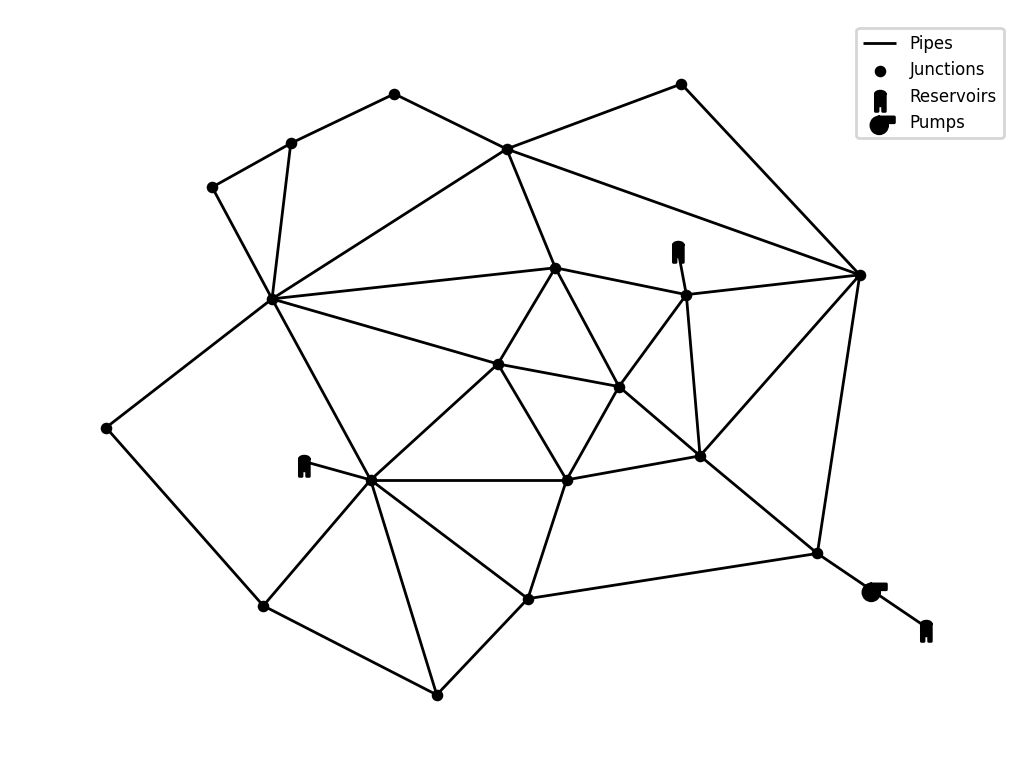

In [14]:
vis = Visualizer(wdn)
vis.show_plot()

The hydraulic components can be colored according to the simulation results by calling the corresponding functions: [color_nodes()]((https://epyt-flow.readthedocs.io/en/stable/epyt_flow.simulation.html#epyt_flow.simulation.visualizer.Visualizer.color_nodes)
), [color_links()](https://epyt-flow.readthedocs.io/en/stable/epyt_flow.simulation.html#epyt_flow.simulation.visualizer.Visualizer.color_links)
, [color_pumps()](https://epyt-flow.readthedocs.io/en/stable/epyt_flow.simulation.html#epyt_flow.simulation.visualizer.Visualizer.color_pumps)
, [color_tanks()](https://epyt-flow.readthedocs.io/en/stable/epyt_flow.simulation.html#epyt_flow.simulation.visualizer.Visualizer.color_tanks)
 and [color_valves()](https://epyt-flow.readthedocs.io/en/stable/epyt_flow.simulation.html#epyt_flow.simulation.visualizer.Visualizer.color_valves)
.
The parameters (e.g. pressure, diameter) are component specific and can be found in the function documentation. The statistic options are the same for the different components and include mean, min, max and time_step. When using the values at a certain timestep, a point in time must be given through the pit parameter.

This example shows the nodes in this function colored according to the pressure at timestep 8.

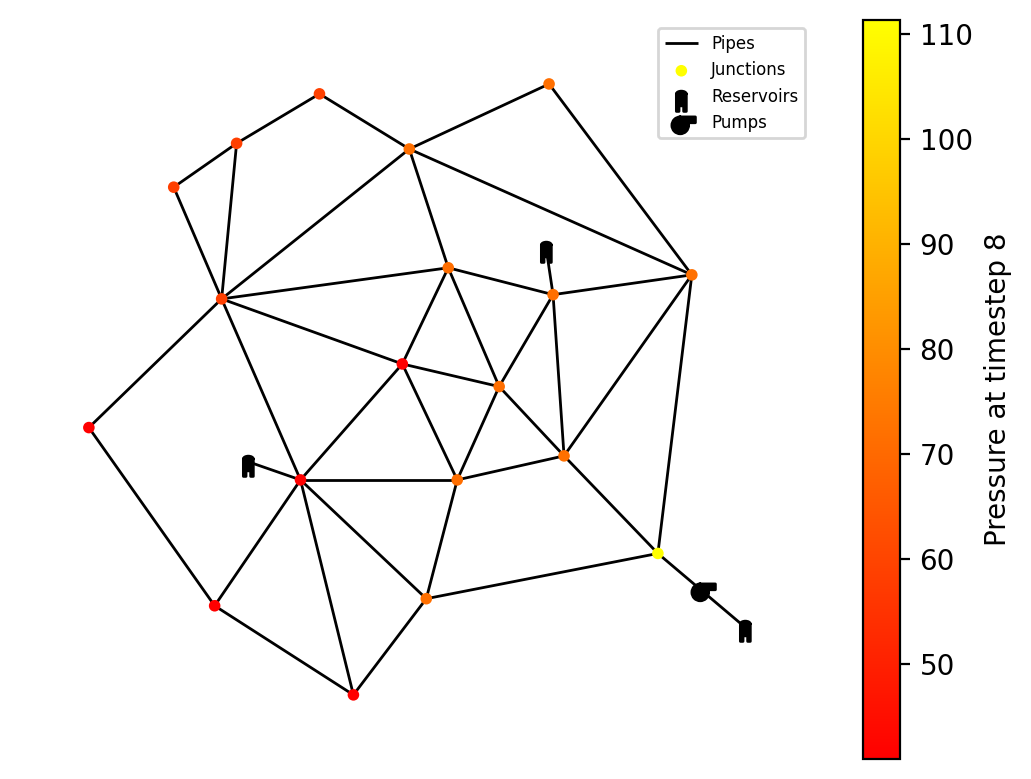

In [15]:
vis = Visualizer(wdn)
vis.color_nodes(parameter='pressure', statistic='time_step', pit=8, colormap='autumn', show_colorbar=True)
vis.show_plot()

Additionally to the [color_links()](https://epyt-flow.readthedocs.io/en/stable/epyt_flow.simulation.html#epyt_flow.simulation.visualizer.Visualizer.color_links)
 method, it is possible to resize the links according to a parameter. Multiple manipulations can be applied to the same graph at once.
If several calls are made to color the same hydraulic component, only the last call is valid.

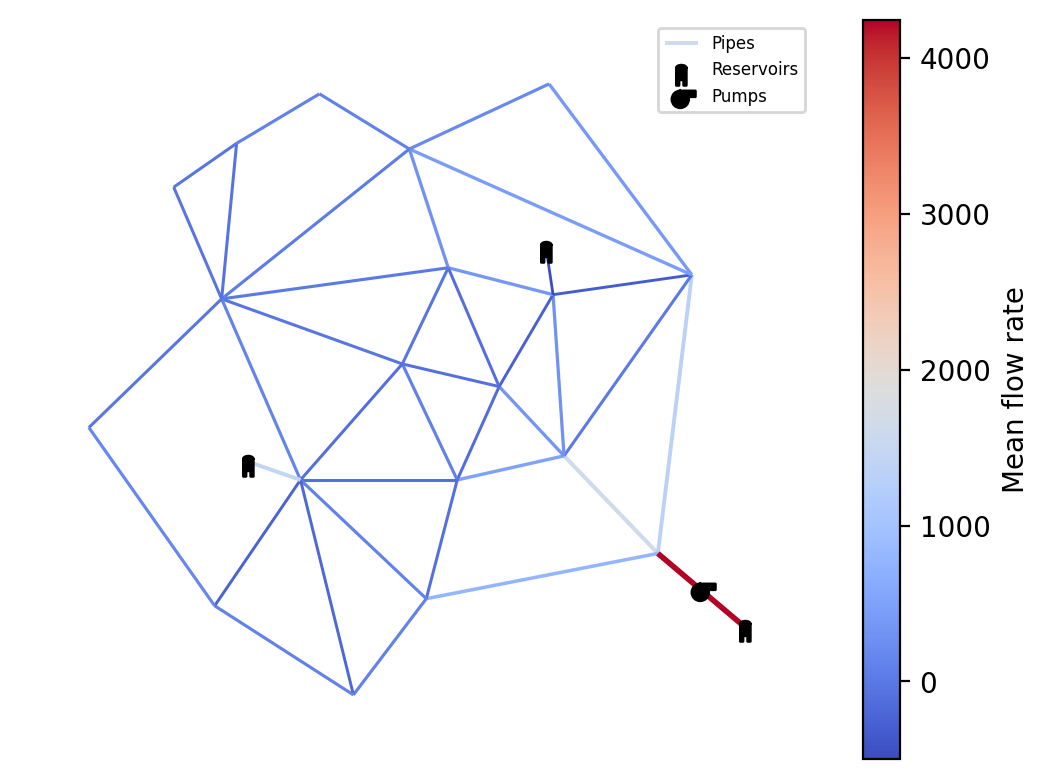

In [7]:
vis = Visualizer(wdn)
vis.color_links(parameter='flow_rate', statistic='mean', show_colorbar=True)
vis.resize_links(parameter='flow_rate', statistic='mean')
vis.hide_nodes()
vis.show_plot()

The colors applied to a component don't have to be continuous. It is possible to either supply an amount of intervals the components should be grouped into by using intervals=3 or to custom divide them by supplying the borders through intervals=[-100, 0, 100].

Conversions to different units can also be applied by using a dictionary containing the required [epyt-flow](https://epyt-flow.readthedocs.io/en/stable/epyt_flow.simulation.scada.html#epyt_flow.simulation.scada.scada_data.ScadaData.convert_units) conversion units.

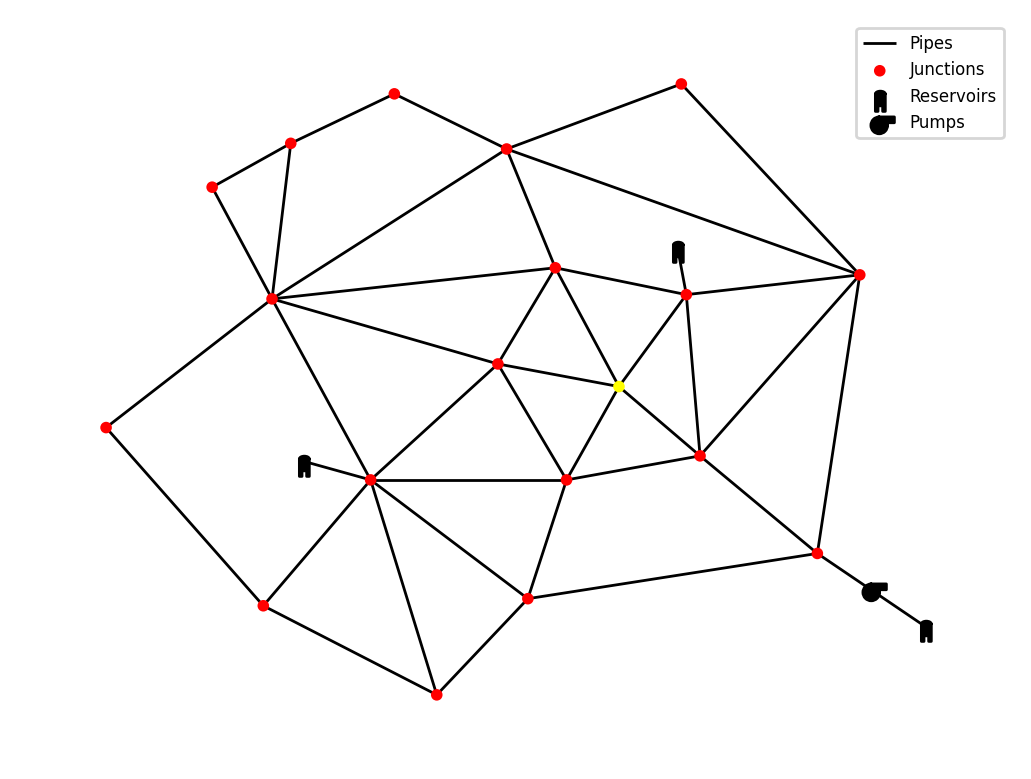

In [16]:
vis = Visualizer(wdn)
vis.color_nodes(parameter='demand', statistic='time_step', pit=8, colormap='autumn', intervals=3, conversion={"flow_unit": 8})
vis.show_plot()

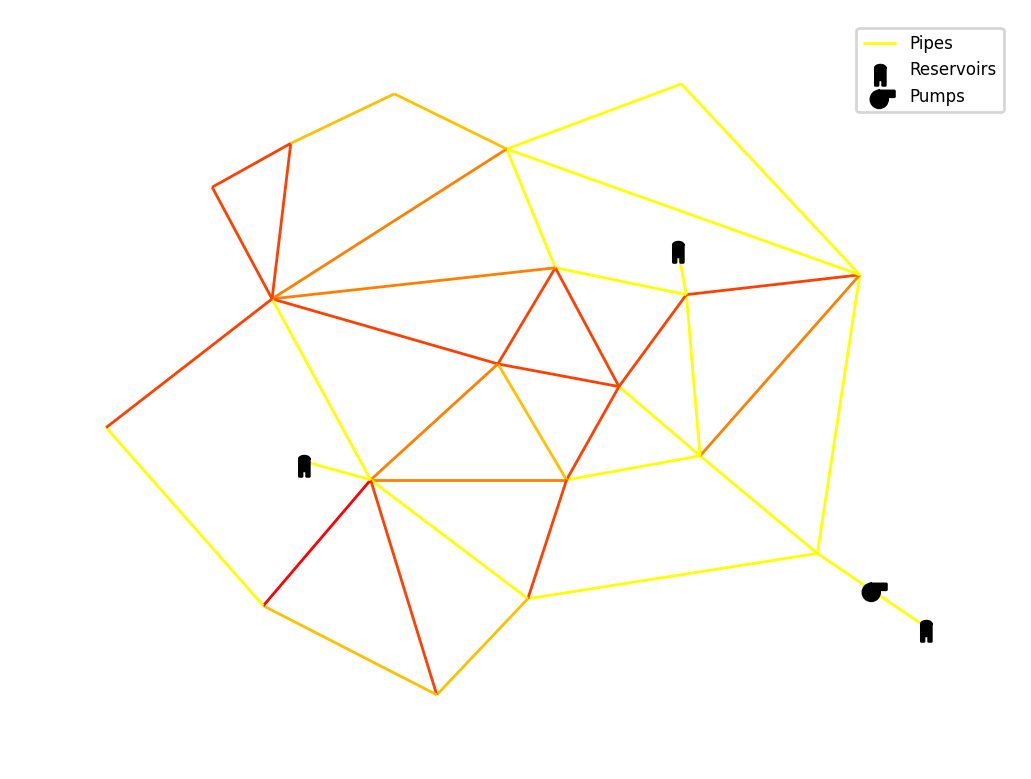

In [17]:
vis = Visualizer(wdn)
vis.color_links(parameter='flow_rate', statistic='max', colormap='autumn', intervals=[-100, 0, 100, 200])
vis.hide_nodes()
vis.show_plot()

The color scheme can be adjusted by providing a matplotlib colormap as a parameter.

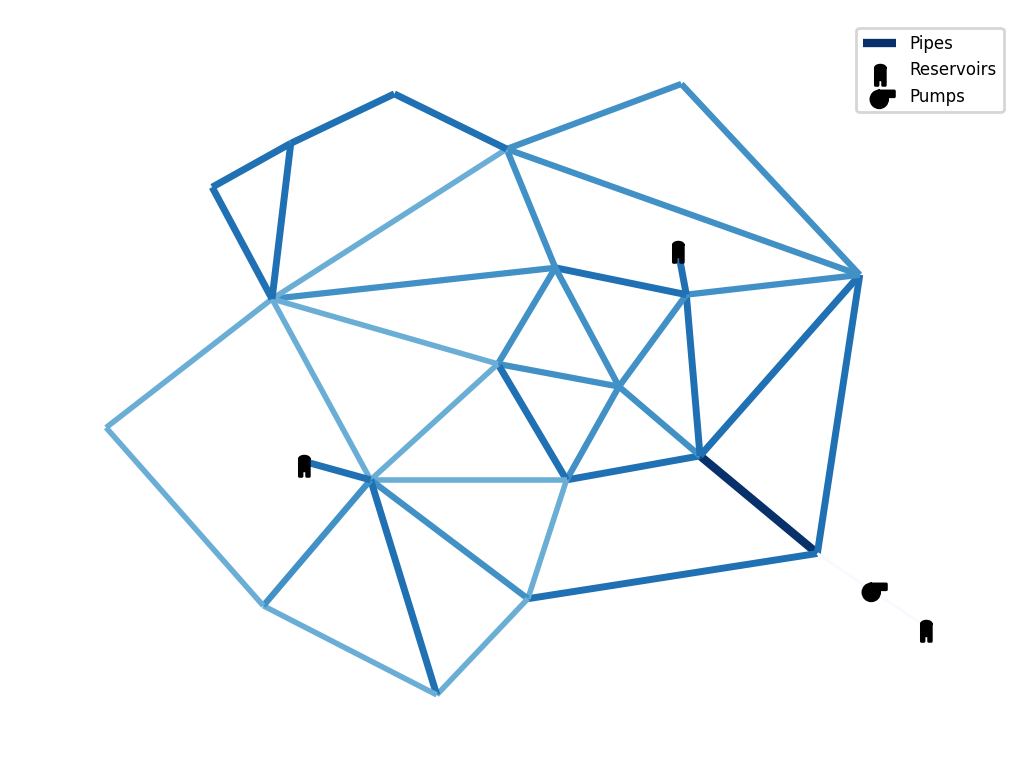

In [10]:
vis = Visualizer(wdn)
vis.color_links(parameter='diameter', colormap='Blues')
vis.resize_links(parameter='diameter', line_widths=(1, 3))
vis.hide_nodes()
vis.show_plot()

It is possible to do an animation of the timestep values over an interval in time. For this, the point in time (pit) parameter must be provided as a tuple of the start and end values.
Further, instead of calling [show_plot()](https://epyt-flow.readthedocs.io/en/stable/epyt_flow.simulation.html#epyt_flow.simulation.visualizer.Visualizer.show_plot)
, [show_animation()](https://epyt-flow.readthedocs.io/en/stable/epyt_flow.simulation.html#epyt_flow.simulation.visualizer.Visualizer.show_animation)
 must be selected. If a file_path (anim.gif) is provided through the export_to_file parameter, the resulting animation is saved.

In [12]:
from IPython.display import HTML

vis = Visualizer(wdn)
vis.color_links(parameter='flow_rate', statistic='time_step', pit=(1, 40))
vis.resize_links(parameter='flow_rate', statistic='time_step', pit=(1, 40), line_widths=(1, 3))
vis.hide_nodes()
anim = vis.show_animation(return_animation=True)
HTML(anim.to_jshtml())

Please close the simulator after use:

In [18]:
wdn.close()